<a href="https://colab.research.google.com/github/Bella9ts/Collaborative-DDoS-Attack-Detection-using-FL/blob/main/01_Federated_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv')

<ipython-input-49-8169a493e68f>:1: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv')


In [ ]:
df.shape

(2219201, 63)

In [ ]:
class_counts = df['Attack_type'].value_counts()

# To get the number of different classes:
num_classes = len(class_counts)

# Print the number of classes and the total count for each class.
print(f"Number of different classes: {num_classes}")
print("\nTotal count for each class:")
print(class_counts)

Number of different classes: 15

Total count for each class:
Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64


In [ ]:
# Drop columns with NaN values
df.dropna(axis=1,inplace=True)

In [ ]:
df.shape

(2219201, 63)

In [ ]:
# Drop rows with NaN values
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df.shape

(2219201, 63)

In [ ]:
classes_to_keep = ['DDoS_UDP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_HTTP', 'Normal']

# Use boolean indexing to filter the DataFrame.
df = df[df['Attack_type'].isin(classes_to_keep)]

In [ ]:
class_counts = df['Attack_type'].value_counts()

# To get the number of different classes:
num_classes = len(class_counts)

# Print the number of classes and the total count for each class.
print(f"Number of different classes: {num_classes}")
print("\nTotal count for each class:")
print(class_counts)

Number of different classes: 5

Total count for each class:
Normal       1615643
DDoS_UDP      121568
DDoS_ICMP     116436
DDoS_TCP       50062
DDoS_HTTP      49911
Name: Attack_type, dtype: int64


# Extract the DDoS attack data and normal traffic data

In [ ]:
import pandas as pd

normal_data = df[df['Attack_type'] == 'Normal']
ddos_udp_data = df[df['Attack_type'] == 'DDoS_UDP']
ddos_icmp_data = df[df['Attack_type'] == 'DDoS_ICMP']
ddos_tcp_data = df[df['Attack_type'] == 'DDoS_TCP']
ddos_http_data = df[df['Attack_type'] == 'DDoS_HTTP']

# Sample each class to have a maximum count of 200,000
max_count = 200000

normal_sampled = normal_data.sample(min(max_count, len(normal_data)))
ddos_udp_sampled = ddos_udp_data.sample(min(max_count, len(ddos_udp_data)))
ddos_icmp_sampled = ddos_icmp_data.sample(min(max_count, len(ddos_icmp_data)))
ddos_tcp_sampled = ddos_tcp_data.sample(min(max_count, len(ddos_tcp_data)))
ddos_http_sampled = ddos_http_data.sample(min(max_count, len(ddos_http_data)))

# Concatenate the sampled data
balanced_df = pd.concat([normal_sampled, ddos_udp_sampled, ddos_icmp_sampled, ddos_tcp_sampled, ddos_http_sampled])

# Shuffle the rows
df = balanced_df.sample(frac=1).reset_index(drop=True)



In [ ]:
class_counts = df['Attack_type'].value_counts()

# To get the number of different classes:
num_classes = len(class_counts)

print(f"Number of different classes: {num_classes}")
print("\nTotal count for each class:")
print(class_counts)

Number of different classes: 5

Total count for each class:
Normal       200000
DDoS_UDP     121568
DDoS_ICMP    116436
DDoS_TCP      50062
DDoS_HTTP     49911
Name: Attack_type, dtype: int64


# Label Encoding the data

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode_object_columns(df):
    # Select columns with object dtype
    object_columns = df.select_dtypes(include='object').columns

    if object_columns.empty:
        print("No object columns to encode.")
        return df

    # Initialize a LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to each object column
    for col in object_columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    print("Label encoding completed for object columns:", object_columns)
    return df


df = label_encode_object_columns(df)

Label encoding completed for object columns: Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.src.proto_ipv4', 'http.file_data', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'tcp.options', 'tcp.payload', 'tcp.srcport',
       'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname',
       'mqtt.topic', 'Attack_type'],
      dtype='object')


In [ ]:
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,212105,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
1,134680,58092,22980,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
2,233079,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
3,270790,58093,22979,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
4,170818,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537972,357410,108614,22980,0,0.0,0.0,0,15463.0,37236.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,1
537973,119026,58092,22980,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
537974,394891,10556,22980,0,0.0,0.0,0,46608.0,59386.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,1
537975,303046,134638,22980,0,0.0,0.0,0,7568.0,26771.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,1


# Perform under-sampling of the majority class using RandomUnderSample

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Create a RandomUnderSampler instance.
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Separate the features and the target variable.
X = df.drop('Attack_type', axis=1)  # Features
y = df['Attack_type']  # Target variable

# Apply under-sampling to balance the data.
X_resampled, y_resampled = rus.fit_resample(X, y)


In [ ]:
class_counts = y_resampled.value_counts()
class_counts

0    49911
1    49911
2    49911
3    49911
4    49911
Name: Attack_type, dtype: int64

# Normalization

In [ ]:
X = X_resampled
Y = y_resampled
normalized_X=(X-X.mean())/X.std()

In [ ]:
normalized_X

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
0,-1.190087,-0.054724,0.396888,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,-0.141884,-0.100614,0.439551,0.436868,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,0.499999
1,-1.284222,-0.054724,0.396888,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,-0.141884,-0.100614,0.439551,0.436868,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,0.499999
2,-1.421194,-0.054724,0.396888,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,-0.141884,-0.100614,0.439551,0.436868,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,0.499999
3,-1.413590,-0.054764,0.396977,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,-0.141884,-0.100614,0.439551,0.436868,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,0.499999
4,-1.373591,-0.054724,0.396888,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,-0.141884,-0.100614,0.439551,0.436868,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,0.499999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249550,0.093032,-0.054764,0.396799,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,-0.141884,-0.100614,-2.002990,-2.003265,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,-1.999996
249551,0.050073,-0.054764,0.396799,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,-0.141884,-0.100614,-2.002990,-2.003265,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,-1.999996
249552,-1.050383,-0.054764,0.396799,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,1.226775,-0.100614,-2.002990,-2.003265,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,-1.999996
249553,-0.697291,-0.054804,0.396888,-0.139306,-0.018943,-0.020022,-0.496753,-0.42013,-0.445096,NaN,...,-0.141884,-0.100614,-2.002990,-2.003265,-0.102926,-0.100614,-0.003923,-0.004128,-0.003757,-1.999996


# Correlation Heat Map

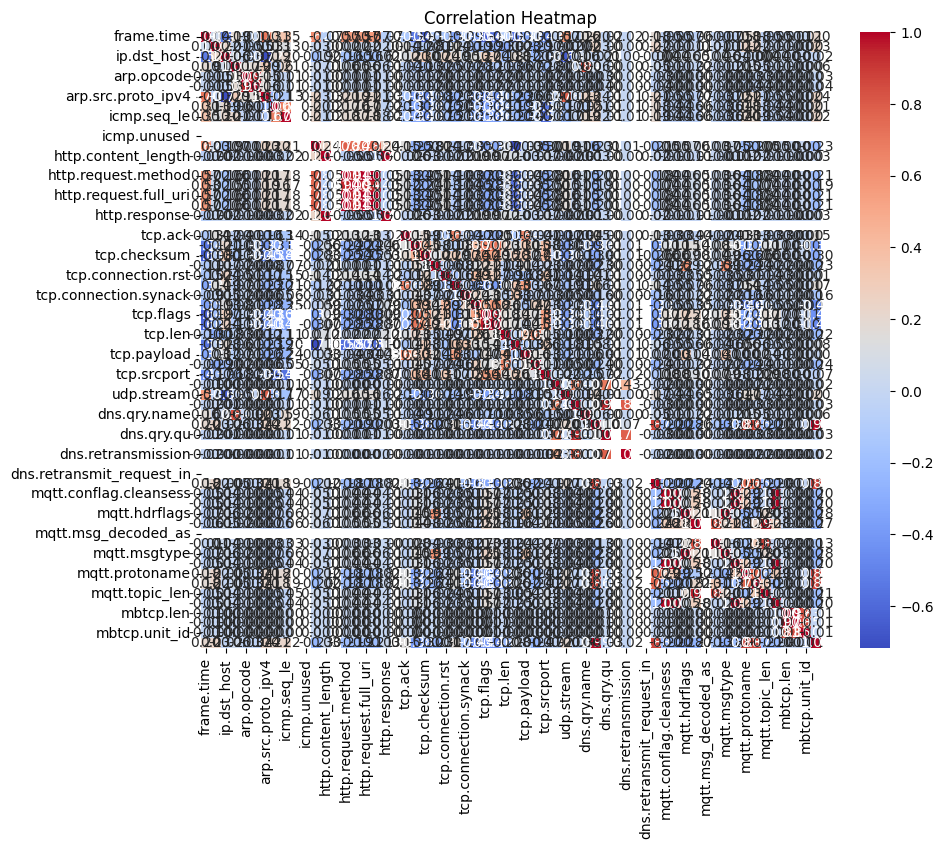

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = normalized_X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Drop correlared features

Correlated Features to be Dropped:
{'mqtt.conack.flags', 'http.request.method', 'arp.src.proto_ipv4', 'mqtt.protoname', 'udp.stream', 'mqtt.conflags', 'mqtt.proto_len', 'http.request.full_uri', 'http.request.version', 'mbtcp.unit_id', 'dns.qry.name', 'mqtt.msgtype', 'arp.hw.size', 'tcp.options', 'mqtt.msg', 'Attack_label', 'dns.qry.qu', 'mqtt.topic', 'dns.retransmission', 'tcp.flags.ack', 'mbtcp.trans_id', 'mqtt.topic_len', 'http.response', 'mqtt.ver', 'http.referer'}


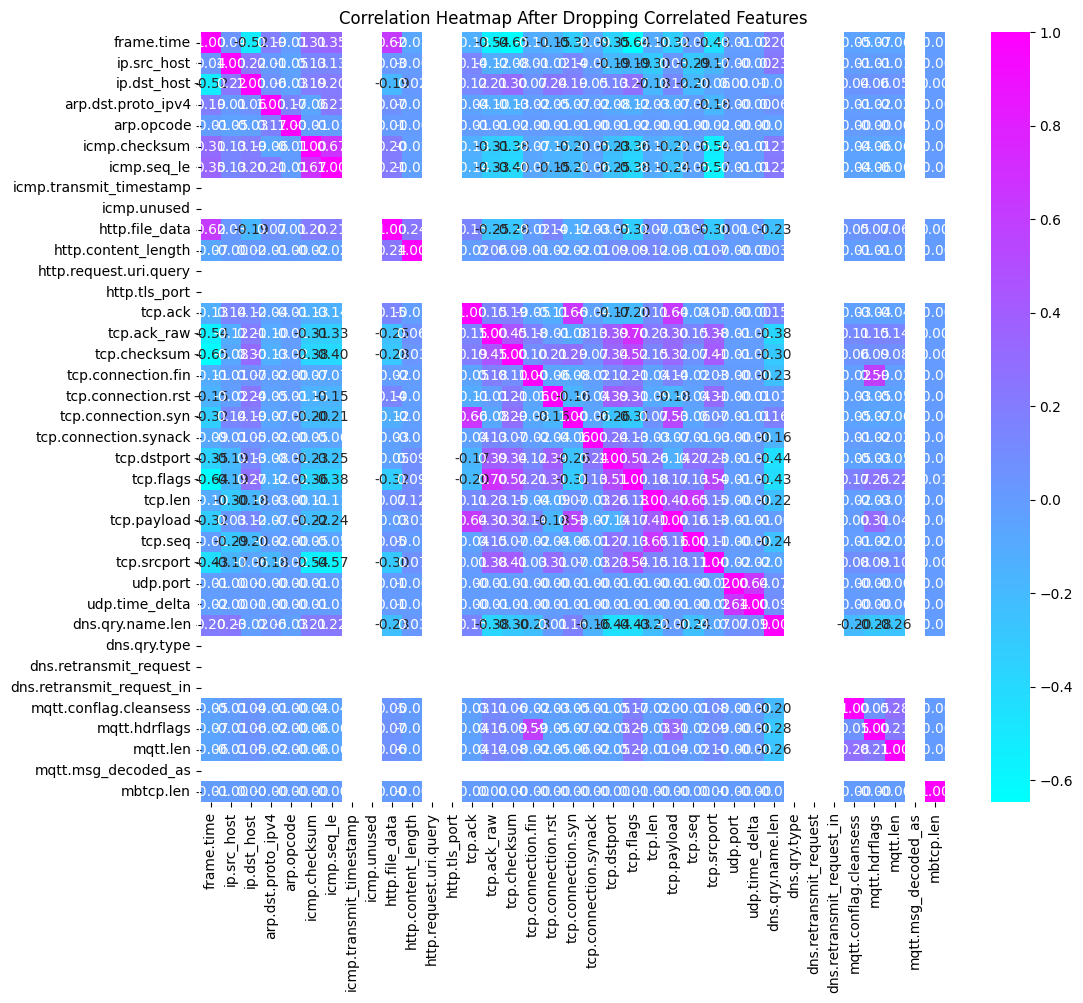

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = normalized_X.corr()

# Set a threshold for correlation.
correlation_threshold = 0.7

# Create a mask to identify highly correlated features
corr_mask = abs(correlation_matrix) > correlation_threshold

# List of features to drop
features_to_drop = set()
for i in range(len(corr_mask.columns)):
    for j in range(i):
        if corr_mask.iloc[i, j]:
            feature_i = corr_mask.columns[i]
            feature_j = corr_mask.columns[j]
            features_to_drop.add(feature_i)

# Drop the correlated features
df_dropped = normalized_X.drop(columns=features_to_drop)

# Print the correlated features to be dropped
print("Correlated Features to be Dropped:")
print(features_to_drop)

# Create a heatmap for the remaining features
plt.figure(figsize=(12, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='cool', fmt=".2f")
plt.title('Correlation Heatmap After Dropping Correlated Features')
plt.show()


In [ ]:
# Drop the column 'column_to_drop'
df_dropped.drop('icmp.transmit_timestamp', axis=1, inplace=True)
df_dropped.drop('icmp.unused', axis=1, inplace=True)
df_dropped.drop('http.request.uri.query', axis=1, inplace=True)
#df_dropped.drop('http.referer', axis=1, inplace=True)
df_dropped.drop('http.tls_port', axis=1, inplace=True)
df_dropped.drop('dns.qry.type', axis=1, inplace=True)
df_dropped.drop('dns.retransmit_request', axis=1, inplace=True)
df_dropped.drop('dns.retransmit_request_in', axis=1, inplace=True)
df_dropped.drop('mqtt.msg_decoded_as', axis=1, inplace=True)
#df_dropped.drop('mbtcp.len', axis=1, inplace=True)
#df_dropped.drop('mbtcp.trans_id', axis=1, inplace=True)
#df_dropped.drop('mbtcp.unit_id', axis=1, inplace=True)

In [ ]:
df_dropped.dtypes

frame.time                float64
ip.src_host               float64
ip.dst_host               float64
arp.dst.proto_ipv4        float64
arp.opcode                float64
icmp.checksum             float64
icmp.seq_le               float64
http.file_data            float64
http.content_length       float64
tcp.ack                   float64
tcp.ack_raw               float64
tcp.checksum              float64
tcp.connection.fin        float64
tcp.connection.rst        float64
tcp.connection.syn        float64
tcp.connection.synack     float64
tcp.dstport               float64
tcp.flags                 float64
tcp.len                   float64
tcp.payload               float64
tcp.seq                   float64
tcp.srcport               float64
udp.port                  float64
udp.time_delta            float64
dns.qry.name.len          float64
mqtt.conflag.cleansess    float64
mqtt.hdrflags             float64
mqtt.len                  float64
mbtcp.len                 float64
dtype: object

# Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_dropped, Y, train_size=0.7, random_state=1)

In [ ]:
import numpy as np

# Calculate the size of each part
part_size = len(X_train) // 6

# Create six equal parts for X
X1 = X_train[:part_size]
X2 = X_train[part_size:2 * part_size]
X3 = X_train[2 * part_size:3 * part_size]
X4 = X_train[3 * part_size:4 * part_size]
X5 = X_train[4 * part_size:5 * part_size]
X6 = X_train[5 * part_size:]

# Create six equal parts for Y
Y1 = Y_train[:part_size]
Y2 = Y_train[part_size:2 * part_size]
Y3 = Y_train[2 * part_size:3 * part_size]
Y4 = Y_train[3 * part_size:4 * part_size]
Y5 = Y_train[4 * part_size:5 * part_size]
Y6 = Y_train[5 * part_size:]


In [ ]:
X1.shape, X2.shape, X3.shape, X4.shape, X5.shape, X6.shape

((29114, 29), (29114, 29), (29114, 29), (29114, 29), (29114, 29), (29118, 29))

In [ ]:
Y1.shape, Y2.shape, Y3.shape, Y4.shape, Y5.shape, Y6.shape

((29114,), (29114,), (29114,), (29114,), (29114,), (29118,))

# Decentralized Training

## 6 clients

Epoch 1/5
910/910 [==============================] - 6s 4ms/step - loss: 0.0798 - accuracy: 0.9779
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0054 - accuracy: 0.9994
Epoch 3/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0027 - accuracy: 0.9996
Epoch 4/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0037 - accuracy: 0.9997
Epoch 5/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0020 - accuracy: 0.9998
Training Time for Local Model: 22.0548095703125 seconds
Epoch 1/5
910/910 [==============================] - 5s 4ms/step - loss: 0.0932 - accuracy: 0.9759
Epoch 2/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0052 - accuracy: 0.9993
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0040 - accuracy: 0.9996
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0043 - accuracy: 0.9996
Epoch 5/5
910/910 [==============================] - 

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 7s 3ms/step - loss: 1.4763 - accuracy: 0.8311
Round 1 completed
Global model accuracy: 0.8310871124267578
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71     15065
           1       1.00      1.00      1.00     15022
           2       1.00      0.58      0.74     15107
           3       0.99      1.00      1.00     14717
           4       1.00      0.58      0.73     14956

    accuracy                           0.83     74867
   macro avg       0.91      0.83      0.83     74867
weighted avg       0.91      0.83      0.83     74867



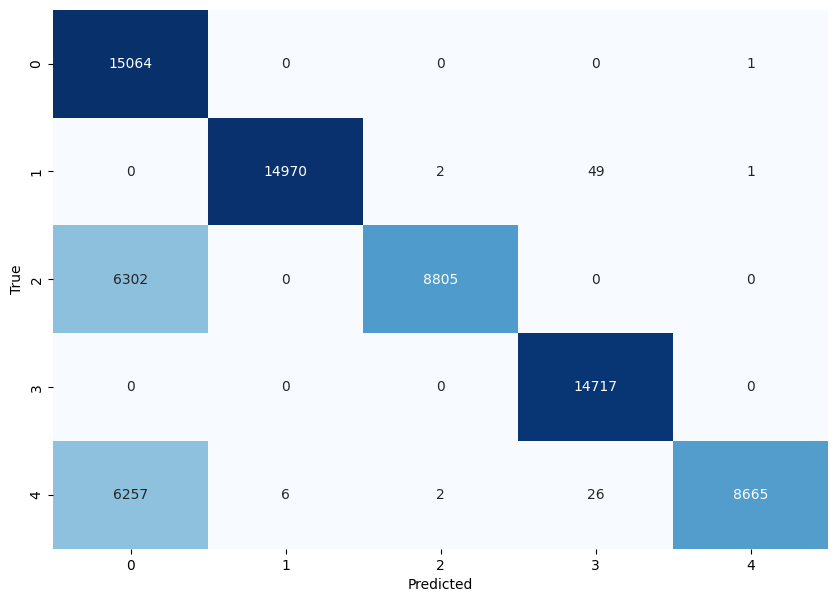

Epoch 1/5
910/910 [==============================] - 5s 5ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 5/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0011 - accuracy: 0.9998
Training Time for Local Model: 18.78348708152771 seconds
Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0028 - accuracy: 0.9999
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0037 - accuracy: 0.9998
Epoch 4/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0025 - accuracy: 0.9997
Epoch 5/5
910/910 [==============================] -

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 2ms/step - loss: 1.4293 - accuracy: 0.8061
Round 2 completed
Global model accuracy: 0.8060827851295471
2340/2340 [==============================] - 5s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     15065
           1       1.00      1.00      1.00     15022
           2       1.00      0.58      0.74     15107
           3       1.00      1.00      1.00     14717
           4       1.00      0.45      0.62     14956

    accuracy                           0.81     74867
   macro avg       0.90      0.81      0.81     74867
weighted avg       0.90      0.81      0.81     74867



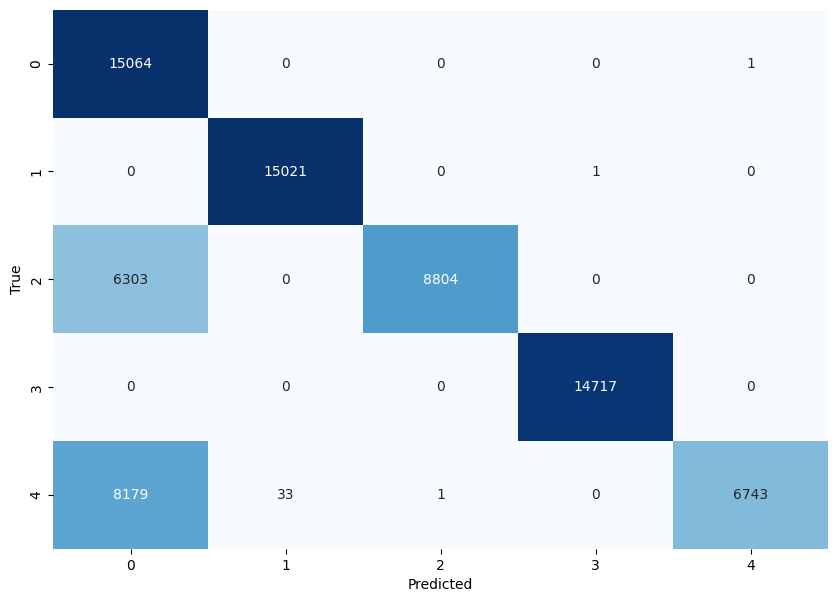

Epoch 1/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 5.3286e-04 - accuracy: 0.9999
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 1.2998e-04 - accuracy: 0.9999
Epoch 4/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 5/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0024 - accuracy: 0.9998
Training Time for Local Model: 20.551021099090576 seconds
Epoch 1/5
910/910 [==============================] - 3s 4ms/step - loss: 4.9626e-04 - accuracy: 0.9999
Epoch 2/5
910/910 [==============================] - 4s 4ms/step - loss: 3.0740e-04 - accuracy: 0.9999
Epoch 3/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 4.6685e-04 - accuracy: 0.9999
Epoch 5/5
910/910 [============

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 7s 3ms/step - loss: 1.4161 - accuracy: 0.8238
Round 3 completed
Global model accuracy: 0.8237674832344055
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       0.57      0.98      0.72     15065
           1       0.99      0.98      0.99     15022
           2       0.99      0.96      0.97     15107
           3       0.90      1.00      0.95     14717
           4       1.00      0.19      0.32     14956

    accuracy                           0.82     74867
   macro avg       0.89      0.82      0.79     74867
weighted avg       0.89      0.82      0.79     74867



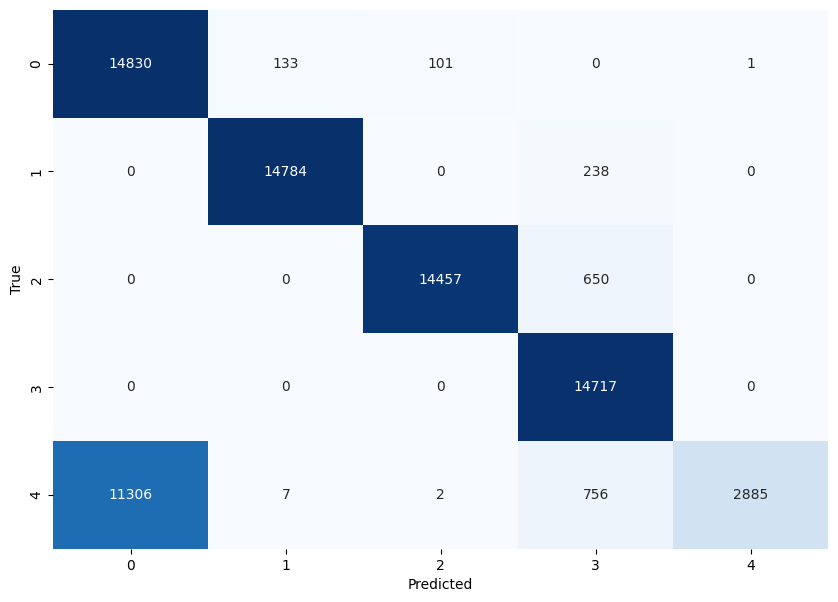

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

class LocalNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):
        self.model = Sequential(name="local_model")
        self.model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.model.add(Dense(l, activation='relu'))
            self.model.add(Dropout(0.3))  # Adding dropout for regularization
        self.model.add(Dense(num_classes, activation='softmax'))
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train(self, X, y, epochs=5, batch_size=50):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size)
        return self.model

    def get_weights(self):
        return self.model.get_weights()

    def set_weights(self, weights):
        self.model.set_weights(weights)

    def evaluate(self, X, Y):
        start_time = time.time()
        X = np.array(X)
        Y = np.array(Y)

        preds = self.model.predict(X)
        preds = [np.argmax(p) for p in preds]

        accuracy = np.sum(preds == Y) / len(Y)
        end_time = time.time()

        print(f"Evaluation Time: {end_time - start_time} seconds")
        print("Classification Report for Local Model:")
        print(classification_report(Y, preds))

        cm = confusion_matrix(Y, preds)

        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        return accuracy

class FedAvgNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):     # Global Model
        self.global_model = Sequential(name="global_model")
        self.global_model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.global_model.add(Dense(l, activation='relu'))
            self.global_model.add(Dropout(0.3))  # Adding dropout for regularization
        self.global_model.add(Dense(num_classes, activation='softmax'))
        self.global_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        self.local_models = [LocalNeuralNetwork(input_dims, layers, num_classes) for _ in range(6)]  #no of clients

    def federated_averaging(self, X_list, y_list, num_epochs=5, batch_size=32, num_rounds=10):     #Federated Averaging
        for round in range(num_rounds):
            local_accuracies = []
            for model, X, y in zip(self.local_models, X_list, y_list):
                start_time = time.time()
                model.train(X, y, epochs=num_epochs, batch_size=batch_size)
                #accuracy = model.evaluate(X, y)
                #local_accuracies.append(accuracy)
                end_time = time.time()
                print(f"Training Time for Local Model: {end_time - start_time} seconds")

            #global_accuracies = [model.evaluate(X_test, Y_test) for model in self.local_models]

            aggregated_weights = np.mean([model.get_weights() for model in self.local_models], axis=0)
            self.global_model.set_weights(aggregated_weights)
            global_accuracy = self.global_model.evaluate(X_test, Y_test)[1]

            #best_client_accuracy = max(local_accuracies)
            #worst_client_accuracy = min(local_accuracies)

            print(f"Round {round + 1} completed")
            #print(f"Best client accuracy: {best_client_accuracy}")
            #print(f"Worst client accuracy: {worst_client_accuracy}")
            print(f"Global model accuracy: {global_accuracy}")

            # Print classification report and confusion matrix for global model
            preds = self.global_model.predict(X_test)
            preds = [np.argmax(p) for p in preds]

            print("Classification Report for Global Model:")
            print(classification_report(Y_test, preds))

            cm = confusion_matrix(Y_test, preds)

            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()


fedavg_nn = FedAvgNeuralNetwork(input_dims=29, layers=[128, 64, 32], num_classes=5)  # Adjusting layer sizes
X_train_list = [X1, X2, X3, X4, X5, X6]
Y_train_list = [Y1, Y2, Y3, Y4, Y5, Y6]
#X_test, Y_test = X_test, Y_test  #test set

fedavg_nn.federated_averaging(X_train_list, Y_train_list, num_epochs=5, batch_size=32, num_rounds=3)



## 5 clients

Epoch 1/5
910/910 [==============================] - 6s 5ms/step - loss: 0.0966 - accuracy: 0.9760
Epoch 2/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0052 - accuracy: 0.9992
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 4/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 5/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0027 - accuracy: 0.9997
Training Time for Local Model: 21.18051838874817 seconds
Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0807 - accuracy: 0.9808
Epoch 2/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0074 - accuracy: 0.9991
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.9996
Epoch 4/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 5/5
910/910 [==============================] -

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 3ms/step - loss: 1.3697 - accuracy: 0.6041
Round 1 completed
Global model accuracy: 0.6040845513343811
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     15065
           1       1.00      0.11      0.21     15022
           2       0.00      0.00      0.00     15107
           3       1.00      0.92      0.96     14717
           4       0.38      1.00      0.55     14956

    accuracy                           0.60     74867
   macro avg       0.62      0.61      0.51     74867
weighted avg       0.62      0.60      0.51     74867



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


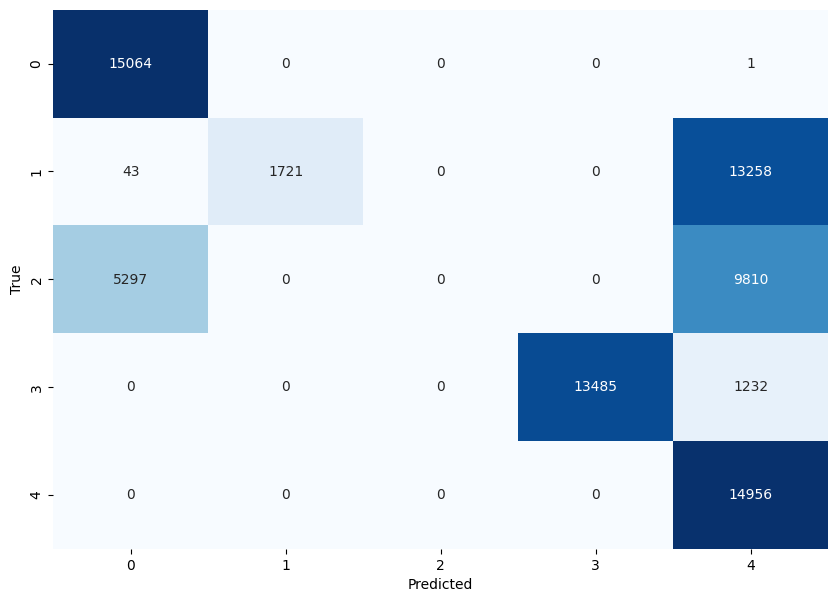

Epoch 1/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 2/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 3/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 5/5
910/910 [==============================] - 3s 4ms/step - loss: 7.4954e-04 - accuracy: 0.9998
Training Time for Local Model: 20.56235122680664 seconds
Epoch 1/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0040 - accuracy: 0.9998
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 0.9997
Epoch 3/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 4/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 5/5
910/910 [=============================

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 7s 3ms/step - loss: 1.2864 - accuracy: 0.7979
Round 2 completed
Global model accuracy: 0.7979483604431152
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69     15065
           1       1.00      0.91      0.95     15022
           2       1.00      0.09      0.17     15107
           3       0.94      1.00      0.97     14717
           4       0.96      1.00      0.98     14956

    accuracy                           0.80     74867
   macro avg       0.88      0.80      0.75     74867
weighted avg       0.88      0.80      0.75     74867



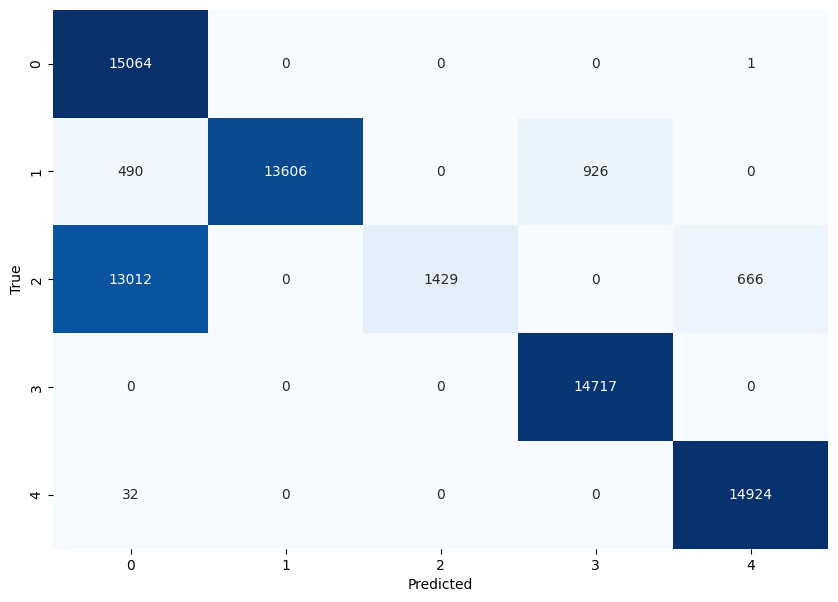

Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 2/5
910/910 [==============================] - 4s 5ms/step - loss: 2.3724e-04 - accuracy: 1.0000
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 2.7586e-04 - accuracy: 0.9999
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 5.3757e-04 - accuracy: 0.9999
Epoch 5/5
910/910 [==============================] - 3s 3ms/step - loss: 3.7056e-04 - accuracy: 0.9999
Training Time for Local Model: 17.831534385681152 seconds
Epoch 1/5
910/910 [==============================] - 4s 5ms/step - loss: 9.6686e-04 - accuracy: 0.9998
Epoch 2/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0020 - accuracy: 0.9999
Epoch 3/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 5.6427e-04 - accuracy: 0.9999
Epoch 5/5
910/910 [========

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 3ms/step - loss: 1.1759 - accuracy: 0.8713
Round 3 completed
Global model accuracy: 0.8712917566299438
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      0.74      0.85     15022
           2       1.00      0.62      0.76     15107
           3       0.99      1.00      1.00     14717
           4       0.61      1.00      0.76     14956

    accuracy                           0.87     74867
   macro avg       0.92      0.87      0.87     74867
weighted avg       0.92      0.87      0.87     74867



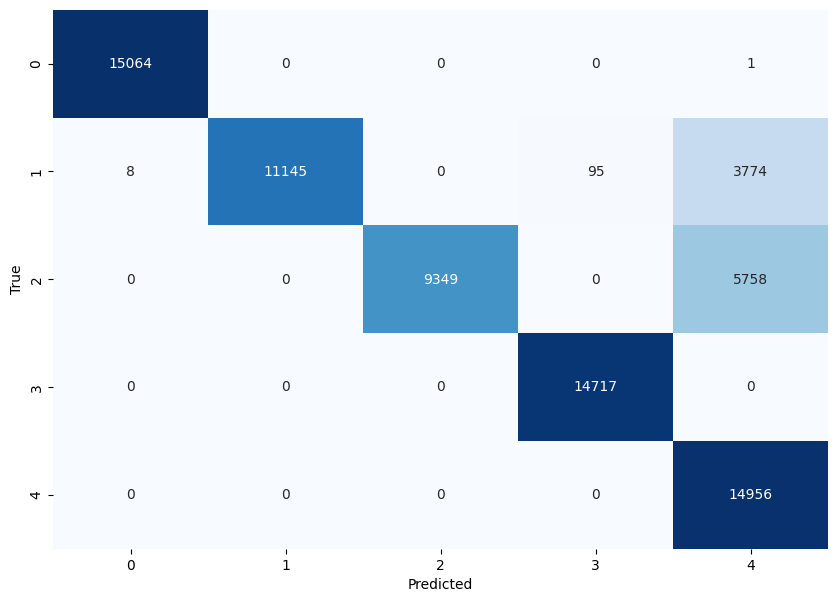

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

class LocalNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):
        self.model = Sequential(name="local_model")
        self.model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.model.add(Dense(l, activation='relu'))
            self.model.add(Dropout(0.3))  # Adding dropout for regularization
        self.model.add(Dense(num_classes, activation='softmax'))
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train(self, X, y, epochs=5, batch_size=50):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size)
        return self.model

    def get_weights(self):
        return self.model.get_weights()

    def set_weights(self, weights):
        self.model.set_weights(weights)

    def evaluate(self, X, Y):
        start_time = time.time()
        X = np.array(X)
        Y = np.array(Y)

        preds = self.model.predict(X)
        preds = [np.argmax(p) for p in preds]

        accuracy = np.sum(preds == Y) / len(Y)
        end_time = time.time()

        print(f"Evaluation Time: {end_time - start_time} seconds")
        print("Classification Report for Local Model:")
        print(classification_report(Y, preds))

        cm = confusion_matrix(Y, preds)

        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        return accuracy

class FedAvgNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):     # Global Model
        self.global_model = Sequential(name="global_model")
        self.global_model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.global_model.add(Dense(l, activation='relu'))
            self.global_model.add(Dropout(0.3))  # Adding dropout for regularization
        self.global_model.add(Dense(num_classes, activation='softmax'))
        self.global_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        self.local_models = [LocalNeuralNetwork(input_dims, layers, num_classes) for _ in range(5)]  #no of clients

    def federated_averaging(self, X_list, y_list, num_epochs=5, batch_size=32, num_rounds=10):     #Federated Averaging
        for round in range(num_rounds):
            local_accuracies = []
            for model, X, y in zip(self.local_models, X_list, y_list):
                start_time = time.time()
                model.train(X, y, epochs=num_epochs, batch_size=batch_size)
                #accuracy = model.evaluate(X, y)
                #local_accuracies.append(accuracy)
                end_time = time.time()
                print(f"Training Time for Local Model: {end_time - start_time} seconds")

            #global_accuracies = [model.evaluate(X_test, Y_test) for model in self.local_models]

            aggregated_weights = np.mean([model.get_weights() for model in self.local_models], axis=0)
            self.global_model.set_weights(aggregated_weights)
            global_accuracy = self.global_model.evaluate(X_test, Y_test)[1]

            #best_client_accuracy = max(local_accuracies)
            #worst_client_accuracy = min(local_accuracies)

            print(f"Round {round + 1} completed")
            #print(f"Best client accuracy: {best_client_accuracy}")
            #print(f"Worst client accuracy: {worst_client_accuracy}")
            print(f"Global model accuracy: {global_accuracy}")

            # Print classification report and confusion matrix for global model
            preds = self.global_model.predict(X_test)
            preds = [np.argmax(p) for p in preds]

            print("Classification Report for Global Model:")
            print(classification_report(Y_test, preds))

            cm = confusion_matrix(Y_test, preds)

            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()


fedavg_nn = FedAvgNeuralNetwork(input_dims=29, layers=[128, 64, 32], num_classes=5)  # Adjusting layer sizes
X_train_list = [X1, X2, X3, X4, X5, X6]
Y_train_list = [Y1, Y2, Y3, Y4, Y5, Y6]
#X_test, Y_test = X_test, Y_test  #test set

fedavg_nn.federated_averaging(X_train_list, Y_train_list, num_epochs=5, batch_size=32, num_rounds=3)



## 4 clients

Epoch 1/5
910/910 [==============================] - 6s 5ms/step - loss: 0.0771 - accuracy: 0.9810
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0073 - accuracy: 0.9995
Epoch 3/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0027 - accuracy: 0.9997
Epoch 4/5
910/910 [==============================] - 5s 6ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 5/5
910/910 [==============================] - 6s 7ms/step - loss: 0.0016 - accuracy: 0.9996
Training Time for Local Model: 23.71146512031555 seconds
Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0814 - accuracy: 0.9806
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0054 - accuracy: 0.9992
Epoch 3/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0040 - accuracy: 0.9998
Epoch 4/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 5/5
910/910 [==============================] -

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 8s 3ms/step - loss: 1.2633 - accuracy: 0.8930
Round 1 completed
Global model accuracy: 0.8930102586746216
2340/2340 [==============================] - 7s 3ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     15065
           1       0.93      1.00      0.96     15022
           2       0.71      0.96      0.82     15107
           3       1.00      0.91      0.95     14717
           4       0.94      1.00      0.97     14956

    accuracy                           0.89     74867
   macro avg       0.92      0.89      0.89     74867
weighted avg       0.92      0.89      0.89     74867



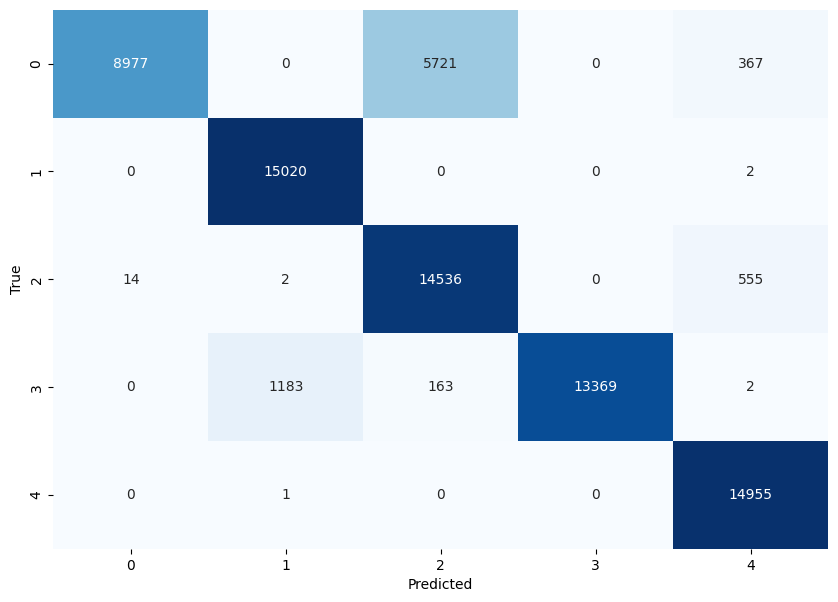

Epoch 1/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 3/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0023 - accuracy: 0.9999
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0010 - accuracy: 0.9997
Epoch 5/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0016 - accuracy: 0.9998
Training Time for Local Model: 17.780768394470215 seconds
Epoch 1/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0040 - accuracy: 0.9997
Epoch 2/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 3/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0027 - accuracy: 0.9997
Epoch 4/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 5/5
910/910 [==============================] 

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 2ms/step - loss: 1.1787 - accuracy: 0.9226
Round 2 completed
Global model accuracy: 0.9226094484329224
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84     15065
           1       0.99      1.00      1.00     15022
           2       1.00      0.64      0.78     15107
           3       1.00      0.99      0.99     14717
           4       0.98      1.00      0.99     14956

    accuracy                           0.92     74867
   macro avg       0.94      0.92      0.92     74867
weighted avg       0.94      0.92      0.92     74867



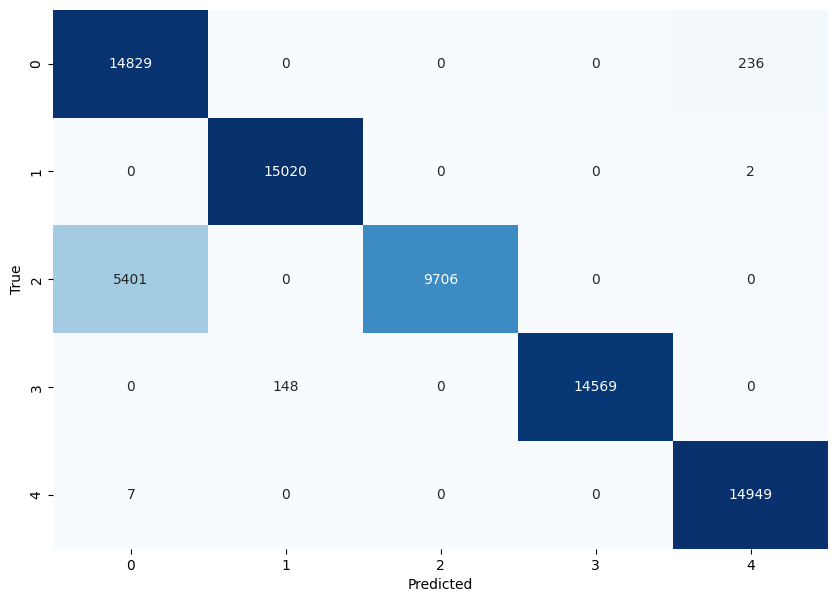

Epoch 1/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 2/5
910/910 [==============================] - 3s 3ms/step - loss: 1.3604e-04 - accuracy: 0.9999
Epoch 3/5
910/910 [==============================] - 4s 5ms/step - loss: 1.9868e-04 - accuracy: 1.0000
Epoch 4/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 5/5
910/910 [==============================] - 3s 3ms/step - loss: 6.7552e-04 - accuracy: 0.9998
Training Time for Local Model: 20.556767225265503 seconds
Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 2/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 3.2833e-04 - accuracy: 0.9999
Epoch 4/5
910/910 [==============================] - 3s 3ms/step - loss: 3.2008e-04 - accuracy: 0.9999
Epoch 5/5
910/910 [============

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 2ms/step - loss: 1.0816 - accuracy: 0.7581
Round 3 completed
Global model accuracy: 0.7580910325050354
2340/2340 [==============================] - 5s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     15065
           1       0.84      1.00      0.91     15022
           2       0.00      0.00      0.00     15107
           3       1.00      0.80      0.89     14717
           4       1.00      1.00      1.00     14956

    accuracy                           0.76     74867
   macro avg       0.67      0.76      0.69     74867
weighted avg       0.66      0.76      0.69     74867



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


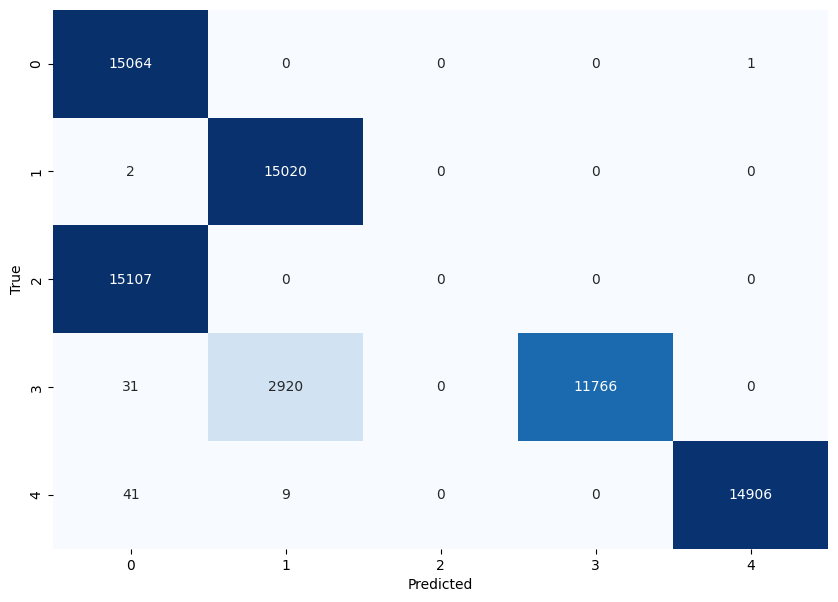

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

class LocalNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):
        self.model = Sequential(name="local_model")
        self.model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.model.add(Dense(l, activation='relu'))
            self.model.add(Dropout(0.3))  # Adding dropout for regularization
        self.model.add(Dense(num_classes, activation='softmax'))
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train(self, X, y, epochs=5, batch_size=50):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size)
        return self.model

    def get_weights(self):
        return self.model.get_weights()

    def set_weights(self, weights):
        self.model.set_weights(weights)

    def evaluate(self, X, Y):
        start_time = time.time()
        X = np.array(X)
        Y = np.array(Y)

        preds = self.model.predict(X)
        preds = [np.argmax(p) for p in preds]

        accuracy = np.sum(preds == Y) / len(Y)
        end_time = time.time()

        print(f"Evaluation Time: {end_time - start_time} seconds")
        print("Classification Report for Local Model:")
        print(classification_report(Y, preds))

        cm = confusion_matrix(Y, preds)

        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        return accuracy

class FedAvgNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):     # Global Model
        self.global_model = Sequential(name="global_model")
        self.global_model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.global_model.add(Dense(l, activation='relu'))
            self.global_model.add(Dropout(0.3))  # Adding dropout for regularization
        self.global_model.add(Dense(num_classes, activation='softmax'))
        self.global_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        self.local_models = [LocalNeuralNetwork(input_dims, layers, num_classes) for _ in range(4)]  #no of clients

    def federated_averaging(self, X_list, y_list, num_epochs=5, batch_size=32, num_rounds=10):     #Federated Averaging
        for round in range(num_rounds):
            local_accuracies = []
            for model, X, y in zip(self.local_models, X_list, y_list):
                start_time = time.time()
                model.train(X, y, epochs=num_epochs, batch_size=batch_size)
                #accuracy = model.evaluate(X, y)
                #local_accuracies.append(accuracy)
                end_time = time.time()
                print(f"Training Time for Local Model: {end_time - start_time} seconds")

            #global_accuracies = [model.evaluate(X_test, Y_test) for model in self.local_models]

            aggregated_weights = np.mean([model.get_weights() for model in self.local_models], axis=0)
            self.global_model.set_weights(aggregated_weights)
            global_accuracy = self.global_model.evaluate(X_test, Y_test)[1]

            #best_client_accuracy = max(local_accuracies)
            #worst_client_accuracy = min(local_accuracies)

            print(f"Round {round + 1} completed")
            #print(f"Best client accuracy: {best_client_accuracy}")
            #print(f"Worst client accuracy: {worst_client_accuracy}")
            print(f"Global model accuracy: {global_accuracy}")

            # Print classification report and confusion matrix for global model
            preds = self.global_model.predict(X_test)
            preds = [np.argmax(p) for p in preds]

            print("Classification Report for Global Model:")
            print(classification_report(Y_test, preds))

            cm = confusion_matrix(Y_test, preds)

            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()


fedavg_nn = FedAvgNeuralNetwork(input_dims=29, layers=[128, 64, 32], num_classes=5)  # Adjusting layer sizes
X_train_list = [X1, X2, X3, X4, X5, X6]
Y_train_list = [Y1, Y2, Y3, Y4, Y5, Y6]
#X_test, Y_test = X_test, Y_test  #test set

fedavg_nn.federated_averaging(X_train_list, Y_train_list, num_epochs=5, batch_size=32, num_rounds=3)



## 3 clients

Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0936 - accuracy: 0.9758
Epoch 2/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 3/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0040 - accuracy: 0.9996
Epoch 4/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0010 - accuracy: 0.9996
Epoch 5/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 0.9998
Training Time for Local Model: 21.19385862350464 seconds
Epoch 1/5
910/910 [==============================] - 5s 4ms/step - loss: 0.0880 - accuracy: 0.9756
Epoch 2/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0069 - accuracy: 0.9992
Epoch 3/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0050 - accuracy: 0.9996
Epoch 5/5
910/910 [==============================] -

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 7s 3ms/step - loss: 0.7574 - accuracy: 0.9998
Round 1 completed
Global model accuracy: 0.9997729063034058
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00     14717
           4       1.00      1.00      1.00     14956

    accuracy                           1.00     74867
   macro avg       1.00      1.00      1.00     74867
weighted avg       1.00      1.00      1.00     74867



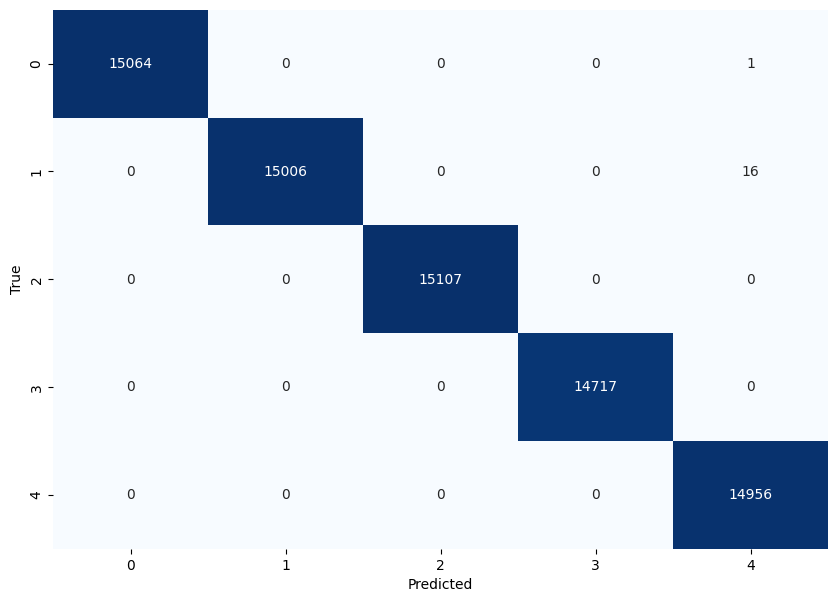

Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0060 - accuracy: 0.9997
Epoch 2/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 9.2871e-04 - accuracy: 0.9998
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 3.6739e-04 - accuracy: 0.9999
Epoch 5/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9997
Training Time for Local Model: 20.549806594848633 seconds
Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0039 - accuracy: 0.9994
Epoch 2/5
910/910 [==============================] - 3s 3ms/step - loss: 9.9030e-04 - accuracy: 0.9999
Epoch 3/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 4/5
910/910 [==============================] - 4s 4ms/step - loss: 4.5657e-04 - accuracy: 0.9999
Epoch 5/5
910/910 [================

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 3ms/step - loss: 0.5858 - accuracy: 0.9918
Round 2 completed
Global model accuracy: 0.991825520992279
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      0.96      0.98     15107
           3       0.96      1.00      0.98     14717
           4       1.00      1.00      1.00     14956

    accuracy                           0.99     74867
   macro avg       0.99      0.99      0.99     74867
weighted avg       0.99      0.99      0.99     74867



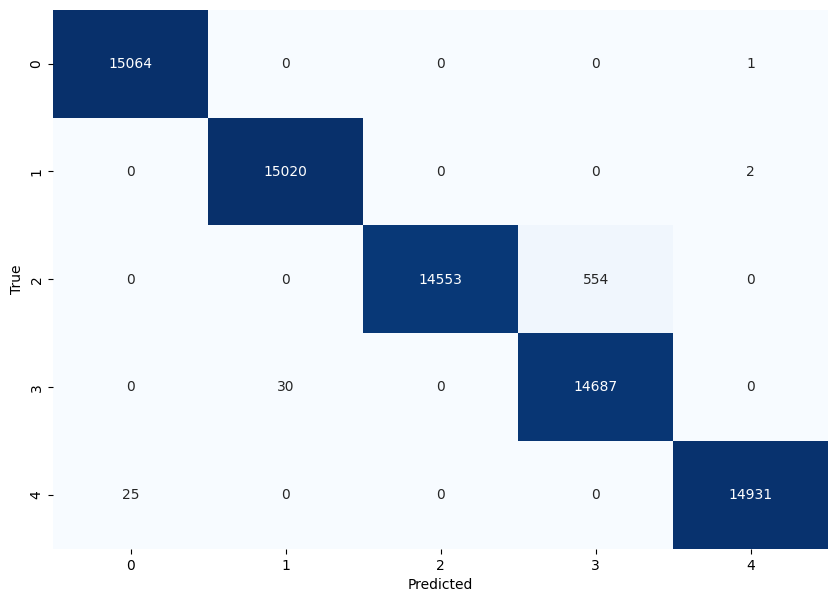

Epoch 1/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 2/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0033 - accuracy: 0.9998
Epoch 3/5
910/910 [==============================] - 4s 4ms/step - loss: 8.6172e-04 - accuracy: 1.0000
Epoch 4/5
910/910 [==============================] - 3s 3ms/step - loss: 1.3448e-04 - accuracy: 0.9999
Epoch 5/5
910/910 [==============================] - 3s 4ms/step - loss: 5.1614e-04 - accuracy: 0.9999
Training Time for Local Model: 20.562015295028687 seconds
Epoch 1/5
910/910 [==============================] - 4s 5ms/step - loss: 9.9224e-04 - accuracy: 0.9998
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0047 - accuracy: 0.9998
Epoch 3/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 4/5
910/910 [==============================] - 3s 3ms/step - loss: 5.1205e-04 - accuracy: 0.9999
Epoch 5/5
910/910 [============

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 2ms/step - loss: 0.4694 - accuracy: 0.9992
Round 3 completed
Global model accuracy: 0.9992386698722839
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00     14717
           4       1.00      1.00      1.00     14956

    accuracy                           1.00     74867
   macro avg       1.00      1.00      1.00     74867
weighted avg       1.00      1.00      1.00     74867



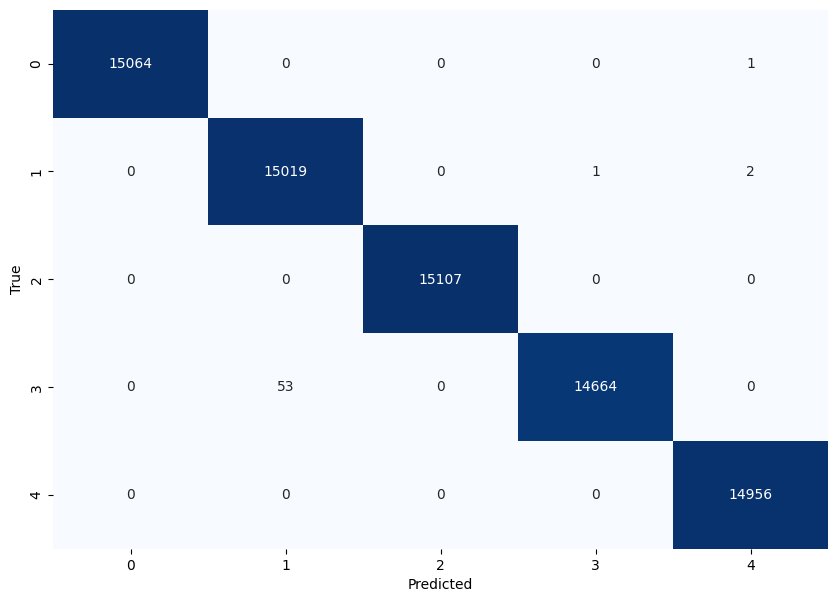

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

class LocalNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):
        self.model = Sequential(name="local_model")
        self.model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.model.add(Dense(l, activation='relu'))
            self.model.add(Dropout(0.3))  # Adding dropout for regularization
        self.model.add(Dense(num_classes, activation='softmax'))
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train(self, X, y, epochs=5, batch_size=50):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size)
        return self.model

    def get_weights(self):
        return self.model.get_weights()

    def set_weights(self, weights):
        self.model.set_weights(weights)

    def evaluate(self, X, Y):
        start_time = time.time()
        X = np.array(X)
        Y = np.array(Y)

        preds = self.model.predict(X)
        preds = [np.argmax(p) for p in preds]

        accuracy = np.sum(preds == Y) / len(Y)
        end_time = time.time()

        print(f"Evaluation Time: {end_time - start_time} seconds")
        print("Classification Report for Local Model:")
        print(classification_report(Y, preds))

        cm = confusion_matrix(Y, preds)

        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        return accuracy

class FedAvgNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):     # Global Model
        self.global_model = Sequential(name="global_model")
        self.global_model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.global_model.add(Dense(l, activation='relu'))
            self.global_model.add(Dropout(0.3))  # Adding dropout for regularization
        self.global_model.add(Dense(num_classes, activation='softmax'))
        self.global_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        self.local_models = [LocalNeuralNetwork(input_dims, layers, num_classes) for _ in range(3)]  #no of clients

    def federated_averaging(self, X_list, y_list, num_epochs=5, batch_size=32, num_rounds=10):     #Federated Averaging
        for round in range(num_rounds):
            local_accuracies = []
            for model, X, y in zip(self.local_models, X_list, y_list):
                start_time = time.time()
                model.train(X, y, epochs=num_epochs, batch_size=batch_size)
                #accuracy = model.evaluate(X, y)
                #local_accuracies.append(accuracy)
                end_time = time.time()
                print(f"Training Time for Local Model: {end_time - start_time} seconds")

            #global_accuracies = [model.evaluate(X_test, Y_test) for model in self.local_models]

            aggregated_weights = np.mean([model.get_weights() for model in self.local_models], axis=0)
            self.global_model.set_weights(aggregated_weights)
            global_accuracy = self.global_model.evaluate(X_test, Y_test)[1]

            #best_client_accuracy = max(local_accuracies)
            #worst_client_accuracy = min(local_accuracies)

            print(f"Round {round + 1} completed")
            #print(f"Best client accuracy: {best_client_accuracy}")
            #print(f"Worst client accuracy: {worst_client_accuracy}")
            print(f"Global model accuracy: {global_accuracy}")

            # Print classification report and confusion matrix for global model
            preds = self.global_model.predict(X_test)
            preds = [np.argmax(p) for p in preds]

            print("Classification Report for Global Model:")
            print(classification_report(Y_test, preds))

            cm = confusion_matrix(Y_test, preds)

            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()


fedavg_nn = FedAvgNeuralNetwork(input_dims=29, layers=[128, 64, 32], num_classes=5)  # Adjusting layer sizes
X_train_list = [X1, X2, X3, X4, X5, X6]
Y_train_list = [Y1, Y2, Y3, Y4, Y5, Y6]
#X_test, Y_test = X_test, Y_test  #test set

fedavg_nn.federated_averaging(X_train_list, Y_train_list, num_epochs=5, batch_size=32, num_rounds=3)



## 2 clients

Epoch 1/5
910/910 [==============================] - 5s 5ms/step - loss: 0.0812 - accuracy: 0.9787
Epoch 2/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0033 - accuracy: 0.9995
Epoch 3/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0044 - accuracy: 0.9996
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 5/5
910/910 [==============================] - 4s 4ms/step - loss: 8.3954e-04 - accuracy: 0.9997
Training Time for Local Model: 21.33737587928772 seconds
Epoch 1/5
910/910 [==============================] - 5s 4ms/step - loss: 0.0937 - accuracy: 0.9755
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0094 - accuracy: 0.9992
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0050 - accuracy: 0.9994
Epoch 4/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 5/5
910/910 [=============================

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 2ms/step - loss: 0.1756 - accuracy: 0.9998
Round 1 completed
Global model accuracy: 0.9998130202293396
2340/2340 [==============================] - 5s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00     14717
           4       1.00      1.00      1.00     14956

    accuracy                           1.00     74867
   macro avg       1.00      1.00      1.00     74867
weighted avg       1.00      1.00      1.00     74867



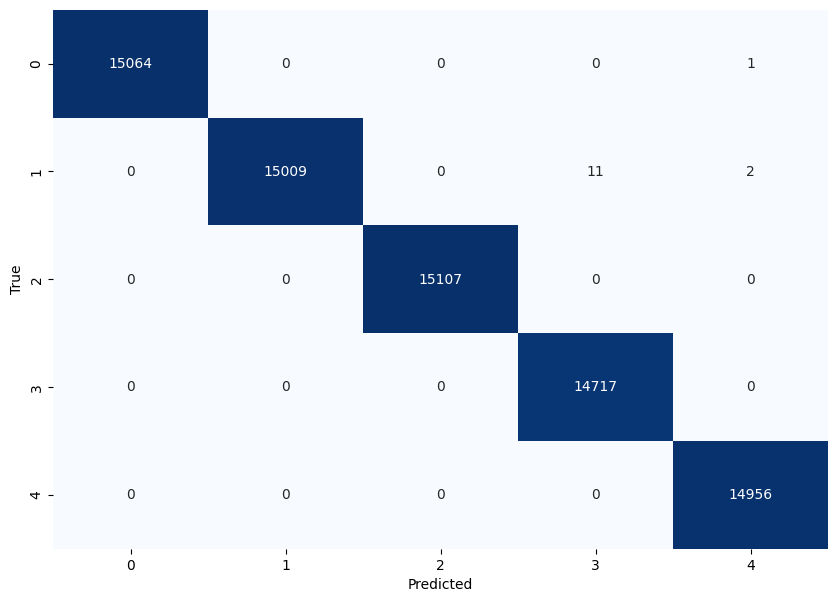

Epoch 1/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 3/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 5/5
910/910 [==============================] - 3s 3ms/step - loss: 2.0538e-04 - accuracy: 0.9999
Training Time for Local Model: 20.54782247543335 seconds
Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 2/5
910/910 [==============================] - 4s 4ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 3/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0023 - accuracy: 0.9998
Epoch 4/5
910/910 [==============================] - 3s 3ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 5/5
910/910 [=============================

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 7s 3ms/step - loss: 0.0722 - accuracy: 0.9995
Round 2 completed
Global model accuracy: 0.9994523525238037
2340/2340 [==============================] - 4s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00     14717
           4       1.00      1.00      1.00     14956

    accuracy                           1.00     74867
   macro avg       1.00      1.00      1.00     74867
weighted avg       1.00      1.00      1.00     74867



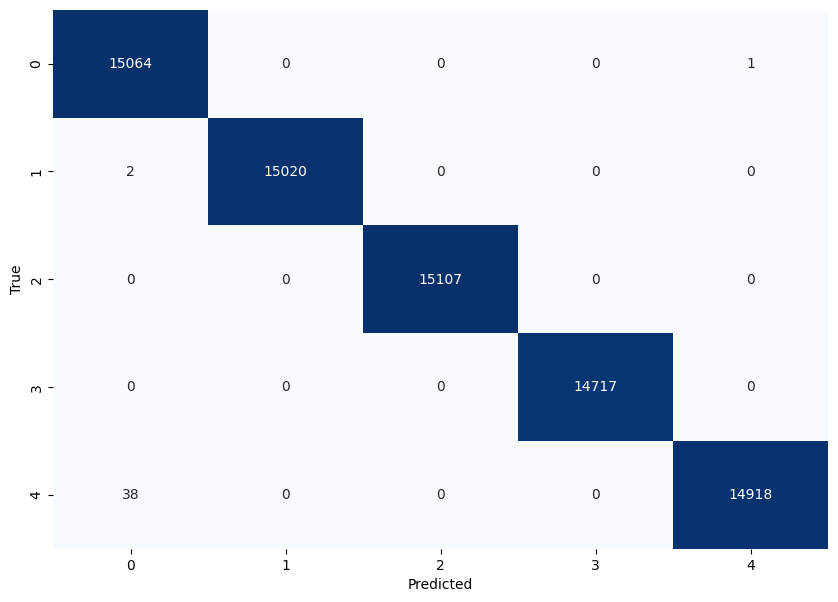

Epoch 1/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 7.5146e-05 - accuracy: 1.0000
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 6.1409e-05 - accuracy: 1.0000
Epoch 4/5
910/910 [==============================] - 3s 4ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 5/5
910/910 [==============================] - 4s 5ms/step - loss: 1.5015e-04 - accuracy: 1.0000
Training Time for Local Model: 20.57137894630432 seconds
Epoch 1/5
910/910 [==============================] - 4s 4ms/step - loss: 6.7438e-04 - accuracy: 0.9999
Epoch 2/5
910/910 [==============================] - 3s 4ms/step - loss: 6.8791e-04 - accuracy: 0.9998
Epoch 3/5
910/910 [==============================] - 3s 4ms/step - loss: 3.0479e-05 - accuracy: 1.0000
Epoch 4/5
910/910 [==============================] - 4s 5ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 5/5
910/910 [=========

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


2340/2340 [==============================] - 6s 2ms/step - loss: 0.1126 - accuracy: 0.9944
Round 3 completed
Global model accuracy: 0.9944301247596741
2340/2340 [==============================] - 5s 2ms/step
Classification Report for Global Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      0.98      0.99     15107
           3       1.00      1.00      1.00     14717
           4       0.98      1.00      0.99     14956

    accuracy                           0.99     74867
   macro avg       0.99      0.99      0.99     74867
weighted avg       0.99      0.99      0.99     74867



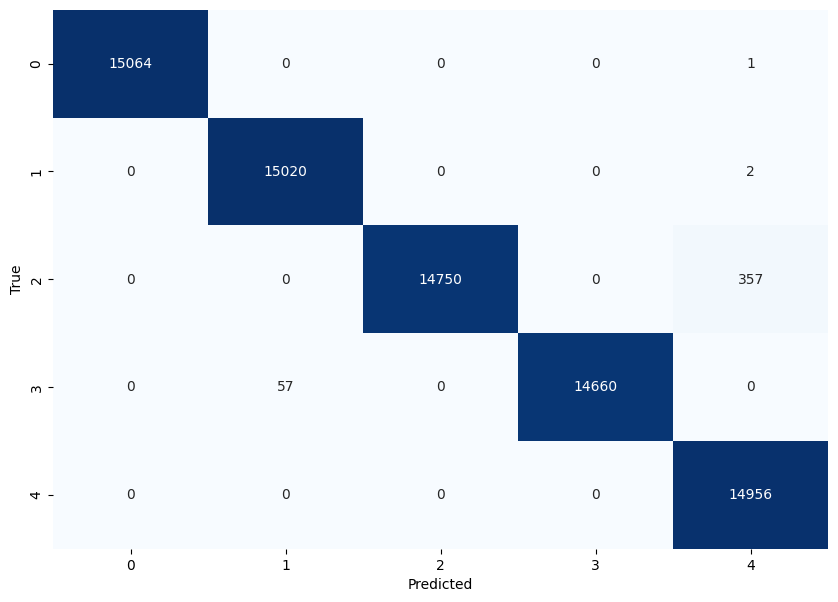

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

class LocalNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):
        self.model = Sequential(name="local_model")
        self.model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.model.add(Dense(l, activation='relu'))
            self.model.add(Dropout(0.3))  # Adding dropout for regularization
        self.model.add(Dense(num_classes, activation='softmax'))
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train(self, X, y, epochs=5, batch_size=50):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size)
        return self.model

    def get_weights(self):
        return self.model.get_weights()

    def set_weights(self, weights):
        self.model.set_weights(weights)

    def evaluate(self, X, Y):
        start_time = time.time()
        X = np.array(X)
        Y = np.array(Y)

        preds = self.model.predict(X)
        preds = [np.argmax(p) for p in preds]

        accuracy = np.sum(preds == Y) / len(Y)
        end_time = time.time()

        print(f"Evaluation Time: {end_time - start_time} seconds")
        print("Classification Report for Local Model:")
        print(classification_report(Y, preds))

        cm = confusion_matrix(Y, preds)

        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        return accuracy

class FedAvgNeuralNetwork:
    def __init__(self, input_dims, layers, num_classes):     # Global Model
        self.global_model = Sequential(name="global_model")
        self.global_model.add(Dense(layers[0], input_shape=(input_dims,), activation='relu'))
        for l in layers[1:]:
            self.global_model.add(Dense(l, activation='relu'))
            self.global_model.add(Dropout(0.3))  # Adding dropout for regularization
        self.global_model.add(Dense(num_classes, activation='softmax'))
        self.global_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        self.local_models = [LocalNeuralNetwork(input_dims, layers, num_classes) for _ in range(2)]  #no of clients

    def federated_averaging(self, X_list, y_list, num_epochs=5, batch_size=32, num_rounds=10):     #Federated Averaging
        for round in range(num_rounds):
            local_accuracies = []
            for model, X, y in zip(self.local_models, X_list, y_list):
                start_time = time.time()
                model.train(X, y, epochs=num_epochs, batch_size=batch_size)
                #accuracy = model.evaluate(X, y)
                #local_accuracies.append(accuracy)
                end_time = time.time()
                print(f"Training Time for Local Model: {end_time - start_time} seconds")

            #global_accuracies = [model.evaluate(X_test, Y_test) for model in self.local_models]

            aggregated_weights = np.mean([model.get_weights() for model in self.local_models], axis=0)
            self.global_model.set_weights(aggregated_weights)
            global_accuracy = self.global_model.evaluate(X_test, Y_test)[1]

            #best_client_accuracy = max(local_accuracies)
            #worst_client_accuracy = min(local_accuracies)

            print(f"Round {round + 1} completed")
            #print(f"Best client accuracy: {best_client_accuracy}")
            #print(f"Worst client accuracy: {worst_client_accuracy}")
            print(f"Global model accuracy: {global_accuracy}")

            # Print classification report and confusion matrix for global model
            preds = self.global_model.predict(X_test)
            preds = [np.argmax(p) for p in preds]

            print("Classification Report for Global Model:")
            print(classification_report(Y_test, preds))

            cm = confusion_matrix(Y_test, preds)

            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                        xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()


fedavg_nn = FedAvgNeuralNetwork(input_dims=29, layers=[128, 64, 32], num_classes=5)  # Adjusting layer sizes
X_train_list = [X1, X2, X3, X4, X5, X6]
Y_train_list = [Y1, Y2, Y3, Y4, Y5, Y6]
#X_test, Y_test = X_test, Y_test  #test set

fedavg_nn.federated_averaging(X_train_list, Y_train_list, num_epochs=5, batch_size=32, num_rounds=3)

